# Serie A 2022-23: Giornate 1-15
## Analisi sul comportamento in termini di occasioni da goal nelle varie situazioni di punteggio 

In [1]:
## Initial Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

from PIL import Image
import urllib
import json
import os
import matplotlib.font_manager as fm
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from highlight_text import fig_text

import ScraperFC as sfc
import traceback
import pandas as pd

import math



gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

teams = ['Fiorentina', 'Milan', 'Atalanta', 'Bologna', 'Cremonese', 'Empoli', 'Hellas Verona', 'Internazionale', 'Juventus', 'Lazio', 'Lecce', 'Monza', 'Roma',
        'Napoli', 'Salernitana', 'Sampdoria', 'Sassuolo', 'Spezia', 'Torino', 'Udinese', 'Genoa', 'Cagliari', 'Venezia', 'Benevento', 'Crotone', 'Parma', 'Brescia', 'Spal']

footId = [8535, 8564, 8524, 9857, 7801, 8534, 9876, 8636, 9885, 8543, 9888, 6504, 8686,
          9875, 6480, 9882, 7943, 9881, 9804, 8600, 10233, 8529, 7881, 6266, 9884, 10167, 9858, 8547]

footTeams = pd.DataFrame({'squadra': teams,
                   'footId': footId})

font_path = "../assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../assets/stylesheets/soc_base.mplstyle")


In [2]:
## Minutes percentage table: preprocessing
df = pd.read_excel('../data/SerieA_22_23_goal_spread.xlsx')
df1 = df.groupby(by='squadra').sum()[['meno2', 'meno1', 'zero', 'uno', 'due']]
final_2 = df1.copy()
final_2['TotMin'] = final_2['meno2']+final_2['meno1']+final_2['zero']+final_2['uno']+final_2['due']

final_2['meno2_perc'] = round(final_2['meno2']/final_2['TotMin'],3)
final_2['meno1_perc'] = round(final_2['meno1']/final_2['TotMin'],3)
final_2['zero_perc'] = round(final_2['zero']/final_2['TotMin'],3)
final_2['uno_perc'] = round(final_2['uno']/final_2['TotMin'],3)
final_2['due_perc'] = round(final_2['due']/final_2['TotMin'],3)
#final_2['zero_perc'] = final_2['zero']/final_2['TotMin']
final_2['zero_perc'] = 1 - final_2['meno2_perc'] - final_2['meno1_perc'] - final_2['uno_perc'] -final_2['due_perc']
final_2 = final_2.reset_index()
final_2.loc[final_2['squadra']=="Napoli", 'punti'] = 41
final_2.loc[final_2['squadra']=="Milan", 'punti'] = 33
final_2.loc[final_2['squadra']=="Lazio", 'punti'] = 30
final_2.loc[final_2['squadra']=="Atalanta", 'punti'] = 27
final_2.loc[final_2['squadra']=="Roma", 'punti'] = 27
final_2.loc[final_2['squadra']=="Udinese", 'punti'] = 24
final_2.loc[final_2['squadra']=="Internazionale", 'punti'] = 30
final_2.loc[final_2['squadra']=="Juventus", 'punti'] = 31
final_2.loc[final_2['squadra']=="Sassuolo", 'punti'] = 16
final_2.loc[final_2['squadra']=="Torino", 'punti'] = 21
final_2.loc[final_2['squadra']=="Salernitana", 'punti'] = 17
final_2.loc[final_2['squadra']=="Empoli", 'punti'] = 17
final_2.loc[final_2['squadra']=="Bologna", 'punti'] = 19
final_2.loc[final_2['squadra']=="Fiorentina", 'punti'] = 19
final_2.loc[final_2['squadra']=="Monza", 'punti'] = 16
final_2.loc[final_2['squadra']=="Spezia", 'punti'] =13
final_2.loc[final_2['squadra']=="Lecce", 'punti'] = 15
final_2.loc[final_2['squadra']=="Sampdoria", 'punti'] = 6
final_2.loc[final_2['squadra']=="Hellas Verona", 'punti'] = 5
final_2.loc[final_2['squadra']=="Cremonese", 'punti'] = 7
final_4 = pd.merge(final_2, footTeams, how = "left")
final_4.replace({
    "squadra":{
         'Fiorentina' : 'FIO',
         'Milan':'MIL',
         'Atalanta':'ATA',
         'Bologna':'BOL',
         'Cremonese':'CRE',
         'Empoli':'EMP',
         'Hellas Verona':'VER',
         'Internazionale':'INT',
         'Juventus':'JUV',
         'Lazio':'LAZ',
         'Lecce':'LEC',
         'Monza':'MON',
         'Roma':'ROM',
         'Napoli':'NAP',
         'Salernitana':'SAL',
         'Sampdoria':'SAM',
         'Sassuolo':'SAS',
         'Spezia':'SPE',
         'Torino':'TOR',
         'Udinese':'UDI',
         'Genoa':'GEN',
         'Cagliari':'CAG',
         'Venezia':'VEN',
         'Benevento':'BEN',
         'Crotone':'CRO',
         'Parma':'PAR',
         'Brescia':'BRE',
         'Spal':'SPA'
    }
}, inplace = True)

In [3]:
## Minutes percentage NPxA, NPxG: preprocessing
df3 = df.groupby(by='squadra').sum()[['meno2', 'meno2_npXA', 'meno2_npXG', 'meno1', 'meno1_npXA', 'meno1_npXG', 'zero', 'zero_npXA', 'zero_npXG',  'uno', 'uno_npXA', 'uno_npXG',  'due', 'due_npXA', 'due_npXG']]
final_3 = df3.copy()
final_3['menoTot'] = final_3['meno2']+final_3['meno1']
final_3['piuTot'] = final_3['uno']+final_3['due']
final_3['menoXATot'] = final_3['meno2_npXA']+final_3['meno1_npXA']
final_3['piuXATot'] = final_3['uno_npXA']+final_3['due_npXA']
final_3['menoXGTot'] = final_3['meno2_npXG']+final_3['meno1_npXG']
final_3['piuXGTot'] = final_3['uno_npXG']+final_3['due_npXG']
final_3['zeroXATot'] = final_3['zero_npXA']+final_3['zero_npXA']
final_3['zeroXGTot'] = final_3['zero_npXG']+final_3['zero_npXG']

final_3['menoXA90'] = final_3['menoXATot']/final_3['menoTot']*90
final_3['piuXA90'] = final_3['piuXATot']/final_3['piuTot']*90
final_3['menoXG90'] = final_3['menoXGTot']/final_3['menoTot']*90
final_3['piuXG90'] = final_3['piuXGTot']/final_3['piuTot']*90
final_3['zeroXA90'] = final_3['zeroXATot']/final_3['zero']*90
final_3['zeroXG90'] = final_3['zeroXGTot']/final_3['zero']*90
final_3 = final_3.reset_index()

final_3.loc[final_3['squadra']=="Napoli", 'punti'] = 32
final_3.loc[final_3['squadra']=="Milan", 'punti'] = 26
final_3.loc[final_3['squadra']=="Lazio", 'punti'] = 24
final_3.loc[final_3['squadra']=="Atalanta", 'punti'] = 27
final_3.loc[final_3['squadra']=="Roma", 'punti'] = 25
final_3.loc[final_3['squadra']=="Udinese", 'punti'] = 22
final_3.loc[final_3['squadra']=="Internazionale", 'punti'] = 24
final_3.loc[final_3['squadra']=="Juventus", 'punti'] = 22
final_3.loc[final_3['squadra']=="Sassuolo", 'punti'] = 15
final_3.loc[final_3['squadra']=="Torino", 'punti'] = 17
final_3.loc[final_3['squadra']=="Salernitana", 'punti'] = 16
final_3.loc[final_3['squadra']=="Empoli", 'punti'] = 11
final_3.loc[final_3['squadra']=="Bologna", 'punti'] = 13
final_3.loc[final_3['squadra']=="Fiorentina", 'punti'] = 13
final_3.loc[final_3['squadra']=="Monza", 'punti'] = 10
final_3.loc[final_3['squadra']=="Spezia", 'punti'] = 9
final_3.loc[final_3['squadra']=="Lecce", 'punti'] = 8
final_3.loc[final_3['squadra']=="Sampdoria", 'punti'] = 6
final_3.loc[final_3['squadra']=="Hellas Verona", 'punti'] = 5
final_3.loc[final_3['squadra']=="Cremonese", 'punti'] = 5
final_5 = pd.merge(final_3, footTeams, how = "left")
final_5.replace({
    "squadra":{
         'Fiorentina' : 'FIO',
         'Milan':'MIL',
         'Atalanta':'ATA',
         'Bologna':'BOL',
         'Cremonese':'CRE',
         'Empoli':'EMP',
         'Hellas Verona':'VER',
         'Internazionale':'INT',
         'Juventus':'JUV',
         'Lazio':'LAZ',
         'Lecce':'LEC',
         'Monza':'MON',
         'Roma':'ROM',
         'Napoli':'NAP',
         'Salernitana':'SAL',
         'Sampdoria':'SAM',
         'Sassuolo':'SAS',
         'Spezia':'SPE',
         'Torino':'TOR',
         'Udinese':'UDI',
         'Genoa':'GEN',
         'Cagliari':'CAG',
         'Venezia':'VEN',
         'Benevento':'BEN',
         'Crotone':'CRO',
         'Parma':'PAR',
         'Brescia':'BRE',
         'Spal':'SPA'
    }
}, inplace = True)

### Alcune indicazioni dal grafico delle percentuali
### - Il Napoli è la squadra che è stata per più minuti in situazione di parità
### - La Lazio invece quella rimasta per più minuti in vantaggio (quasi 44% del tempo)
### - La Sampdoria è stata davvero tantissimo tempo sotto nel punteggio (61%)

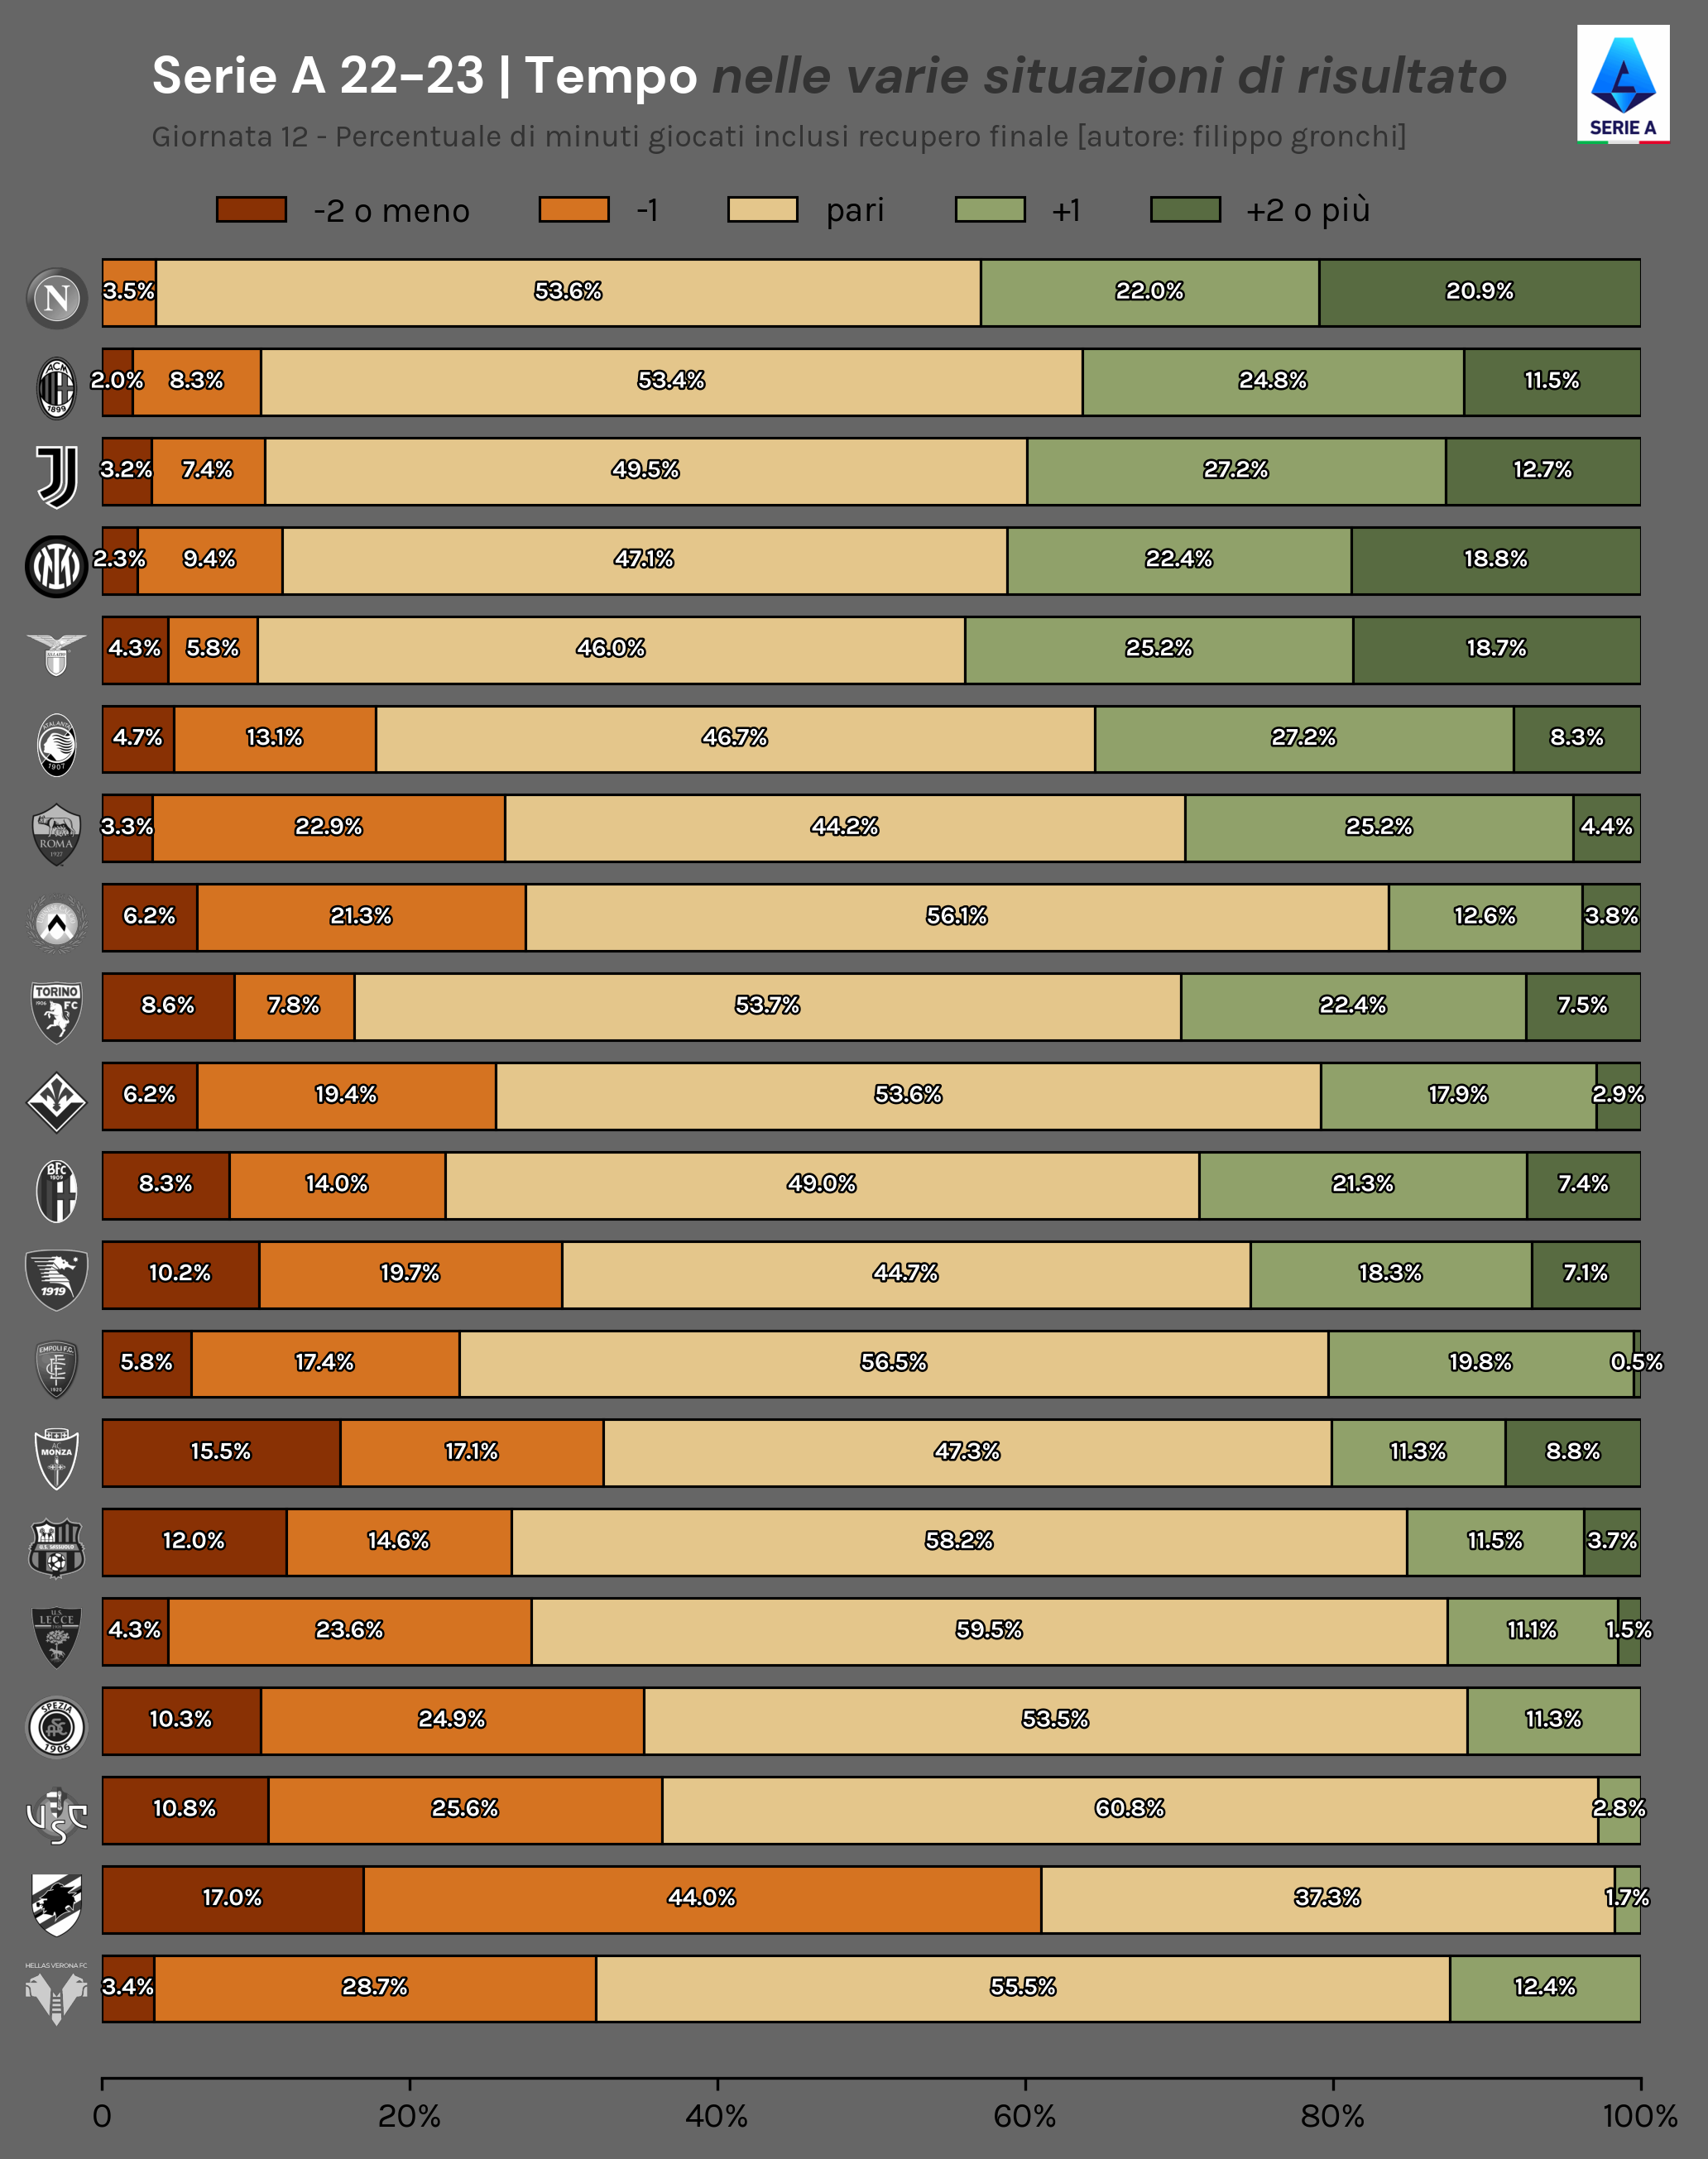

In [4]:
## Minutes Percentage: 100% horizontal barchart
dataset = final_4.sort_values(by='punti', ascending=True).reset_index(drop=True)
sort_order = dataset["squadra"].to_list()
def add_logo_on_ax(ax, team_id, bw = True):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png')).convert('LA')
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax


fig = plt.figure(figsize=(8,10), dpi=300, facecolor = "#666666")
ax = plt.subplot(facecolor = "#666666")
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.grid(ls='--', lw=1, color='lightgrey', axis='y')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
max_ = 1
ax.set_xlim(0, max_)
ax.set_ylim(-1, dataset.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.set_xlabel('(PSxG-GA)/PSxG', size=10)
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
#norm = mcolors.Normalize(vmin=dataset['goal-xGOT'].min(),vmax=dataset['goal-xGOT'].max())
#cmap = plt.get_cmap('SOC')
height_meno2 = (
    dataset["meno2_perc"]
    .reset_index(drop = True)
)

height_meno1 = (
    dataset["meno1_perc"]
    .reset_index(drop = True)
)
height_zero = (
    dataset["zero_perc"]
    .reset_index(drop = True)
)

height_uno = (
    dataset["uno_perc"]
    .reset_index(drop = True)
)
height_due = (
    dataset["due_perc"]
    .reset_index(drop = True)
)

X = np.arange(len(height_meno2))
# -2
ax.barh(
    X, 
    height_meno2, 
    ec = "black",
    #hatch='//////',
    lw = .75, 
    color = "#893104", #"#d80000", 
    zorder = 3, 
    height = 0.75,
    label = "-2 o meno"
)

# -1
ax.barh(
    X, 
    height_meno1,
    left = height_meno2, # This creates the stacked chart
    #hatch='//////',
    ec = "black", 
    lw = .75, 
    color = "#d57321", #"#ea8526", 
    zorder = 3, 
    height = 0.75,
    label = "-1"
)
# 0
val2 = height_meno2+height_meno1
ax.barh(
    X, 
    height_zero, 
    left = val2,
    #hatch='//////',
    ec = "black", 
    lw = .75, 
    color = "#e4c68b", #"#e2e3a1", 
    zorder = 3, 
    height = 0.75,
    label = "pari"
)
# +1
val3 = height_meno2+height_meno1+height_zero
ax.barh(
    X, 
    height_uno,
    left = val3, # This creates the stacked chart
    #hatch='//////',
    ec = "black", 
    lw = .75, 
    color = "#90a16a", #"#329209", 
    zorder = 3, 
    height = 0.75,
    label = "+1"
)
# +2
val4 = height_meno2+height_meno1+height_zero+height_uno
ax.barh(
    X, 
    height_due,
    left = val4,
    ec = "black",
    #hatch='|||||||',
    lw = .75, 
    color = "#586b41", #"#235f08", 
    zorder = 3, 
    height = 0.75,
    label = "+2 o più"
)


# Annotate the bar chart
aux_counter = 0
for y_1, y_2, y_3, y_4, y_5 in zip(height_meno2, height_meno1, height_zero, height_uno, height_due):
    # annotate percentage of fouls in the center of the bar
    if (y_1!=0):
        meno2_text = ax.annotate(
            xy = (y_1/2, aux_counter),
            text = f"{y_1:.1%}", # F-strings are cool :)
            size = 7,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 0
        )
    if (y_2!=0):
        meno1_text = ax.annotate(
            xy = (y_1+y_2/2, aux_counter),
            text = f"{y_2:.1%}", # F-strings are cool :)
            size = 7,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 0
        )
    if (y_3!=0):
        zero_text = ax.annotate(
            xy = (y_1+y_2+y_3/2, aux_counter),
            text = f"{y_3:.1%}", # F-strings are cool :)
            size = 7,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 0
        )
    if (y_4!=0):
        uno_text = ax.annotate(
            xy = (y_1+y_2+y_3+y_4/2, aux_counter),
            text = f"{y_4:.1%}", # F-strings are cool :)
            size = 7,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 0
        )
    if (y_5!=0):
        due_text = ax.annotate(
            xy = (y_1+y_2+y_3+y_4+y_5/2, aux_counter),
            text = f"{y_5:.1%}", # F-strings are cool :)
            size = 7,
            ha = "center",
            va = "center",
            weight = "bold",
            color = "white",
            rotation = 0
        )
    if (y_1!=0):
        meno2_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.25, foreground="black"), path_effects.Normal()]
        )
    if (y_2!=0):
        meno1_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.25, foreground="black"), path_effects.Normal()]
        )
    if (y_3!=0):
        zero_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.25, foreground="black"), path_effects.Normal()]
        )
    if (y_4!=0):
        uno_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.25, foreground="black"), path_effects.Normal()]
        )
    if (y_5!=0):
        due_text.set_path_effects(
            [path_effects.Stroke(linewidth=1.25, foreground="black"), path_effects.Normal()]
        )
    aux_counter += 1

# Adjust ticks
#yticks_ = ax.yaxis.set_ticks(
#    ticks = X,
#    labels = sort_order,
#    rotation = 0
#)
# -- Transformation functions
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1])
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
ax_coords = DC_to_NFC((0.95,20.5))
ax_size = 0.06
image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
)
league_id = 55
fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{league_id:.0f}.png'))
image_ax.imshow(club_icon)
image_ax.axis('off')


DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
height = 0.75
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, team_id in enumerate(dataset["footId"]):
    ax_coords = DC_to_NFC([-0.05, index - 0.69*height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.032, 0.032], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert('LA')
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")

    #logo_ax.annotate(
    #    xy =(0, 0),
    #    text = f"({dataset['squadra'].iloc[index]})",
    #    xytext = (8, -22),
    #    textcoords = "offset points",
    #    size = 5,
    #    ha = "center",
    #    va = "center"
    #)

ax.set_xticks((0, 0.2, 0.4, 0.6, 0.8, 1))
ax.set_xticklabels(('0', '20%', '40%', '60%', '80%', '100%'))
#ax.set_axis_off()
ax.legend(
    ncol = 5, 
    loc = "upper center", 
    bbox_to_anchor = (0.45, 1.022),
    frameon = False
)

fig_text(
    x = 0.15, y = .92, 
    s = "Serie A 22-23 | Tempo <nelle varie situazioni di risultato>",
    highlight_textprops=[{"color":"#333333", "style":"italic"}],
    va = 'bottom', ha = 'left',
    fontsize = 15, color = 'white', font = 'DM Sans', weight = 'bold'
)

subTitle =  "Giornata 12 - Percentuale di minuti giocati inclusi recupero finale [autore: filippo gronchi]"
fig_text(
    x = 0.15, y = 0.9, 
    s = subTitle,
    va = 'bottom', ha = 'left',
    fontsize = 9, color = '#333333'
)

filenameStr = "../figures/SerieA_22_23_goal_spread_12.png"
plt.savefig(
	filenameStr,
	dpi = 600,
	facecolor = "#666666",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.show()

## Adesso andiamo a capire come cambia nelle varie situazioni l'atteggiamento delle singole squadre
### Utilizziamo uno scatterplot considerando npxG90 e npxA90 ossia gli expected goal creati rispetto a quelli subiti non considerando i rigori normalizzate considerando 90 minuti.

### ***Parità***
### [Inter e Napoli nettamente avanti a tutte, subito dietro il Milan. Malissimo Sampdoria, male Cremonese e Spezia. Lecce crea poco ma subisce altrettanto poco]

C:\Users\fgron\AppData\Local\Temp\ipykernel_21164\2321931208.py:4: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)


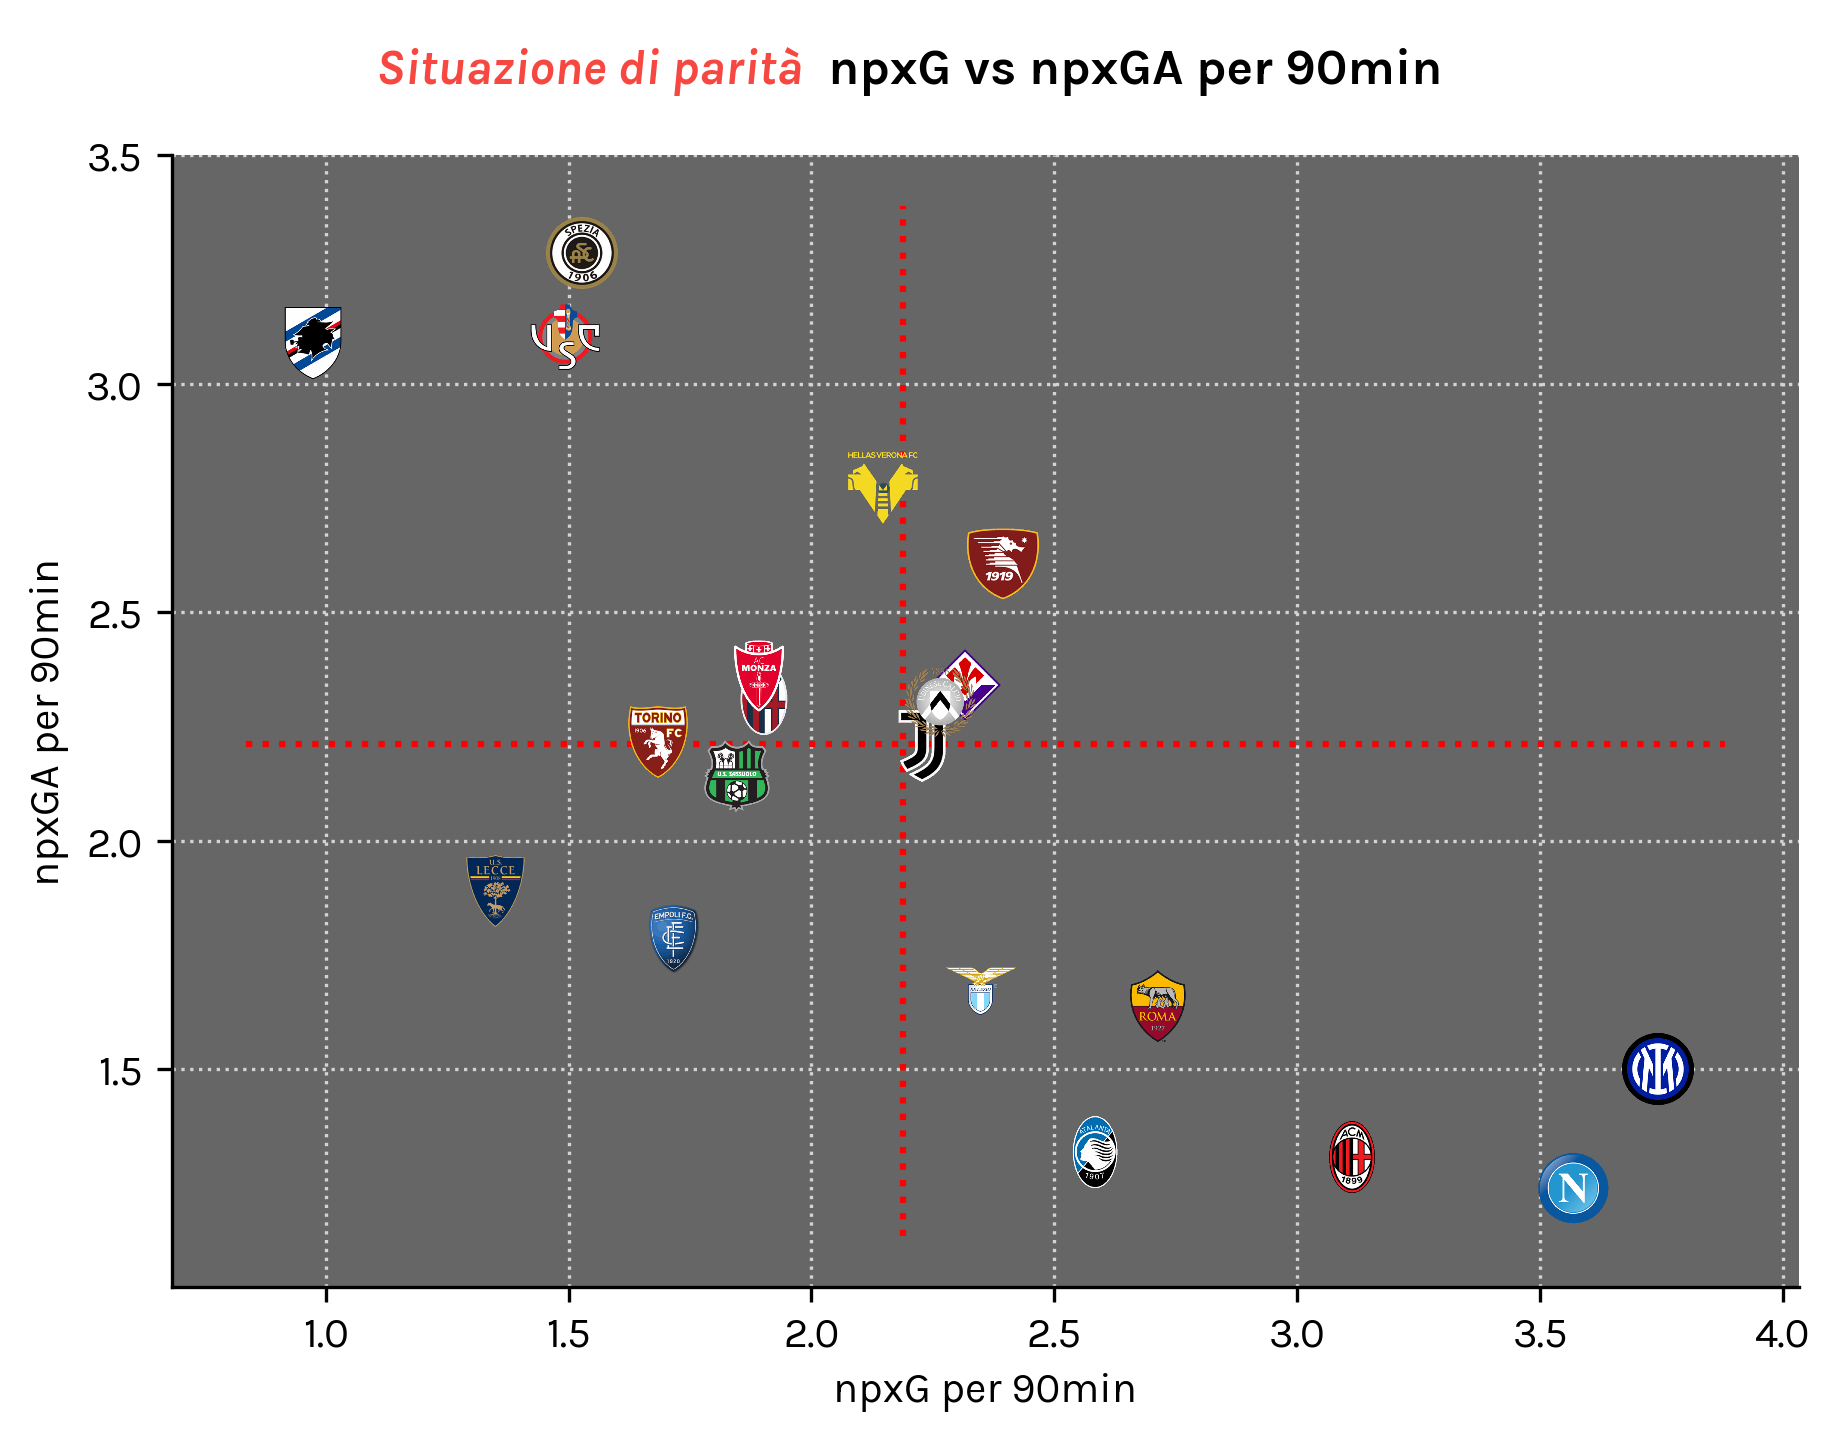

In [5]:
## Parità: scatterplot
dataset = final_5
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)

fig = plt.figure(figsize = (7,5), dpi = 300)
ax = plt.subplot(facecolor = "#666666")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(
    dataset["zeroXG90"], 
    dataset["zeroXA90"], 
    s = 3, 
    alpha = 0.75, 
    color = "#264653",
    zorder = 3
)
ax.plot(
    [dataset["zeroXG90"].median(), dataset["zeroXG90"].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "red",
    zorder = 2
)
ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [dataset["zeroXA90"].median(), dataset["zeroXA90"].median()], 
    ls = ":",
    color = "red",
    zorder = 2
)
ax.grid(True, ls = ":", color = "lightgray")

#squadra = "FIO"
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, name in enumerate(dataset["squadra"]):
    X = dataset["zeroXG90"].iloc[index]
    Y = dataset["zeroXA90"].iloc[index]
    y_pos = -9
    x_pos = 0
    path = fotmob_url + str(dataset["footId"].iloc[index]) + ".png"
    frame = False
    #if (name == squadra):
    #    frame = True
    ab = AnnotationBbox(getImage(path), (X, Y), frameon=frame)
    ax.add_artist(ab)

ax.set_ylabel("npxGA per 90min")
ax.set_xlabel("npxG per 90min")

fig_text(
        x = 0.73, y = 0.92, 
        s = "<Situazione di parità>  npxG vs npxGA per 90min",
        highlight_textprops=[{"color":"#F64740", "style":"italic"}],
        va = "bottom", ha = "right",
        fontsize = 12, color = "black", weight = "bold"
)
subTitle =  ""
fig_text(
	    x = 0.87, y = .94, 
        s = subTitle,
	    va = "bottom", ha = "right",
	    fontsize = 7, color = "#4E616C",
)

filename = "../figures/xGA_xG_parita_SerieA_22_23_12.png"
plt.savefig(
	    filename,
	    dpi = 600,
	    facecolor = "none",
	    bbox_inches="tight",
        edgecolor="none",
	    transparent = False
    )

### ***Vantaggio***
### [In questa situazizone la Roma da il meglio di se continuando comunque ad attaccare e subendo relativamente poco. Male Lecce e Cremonese. La Sampdoria non crea ma qui è soprattutto dovuto al fatto che sia stata in vantaggio solo una manciata di minuti]

C:\Users\fgron\AppData\Local\Temp\ipykernel_21164\628649141.py:4: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)


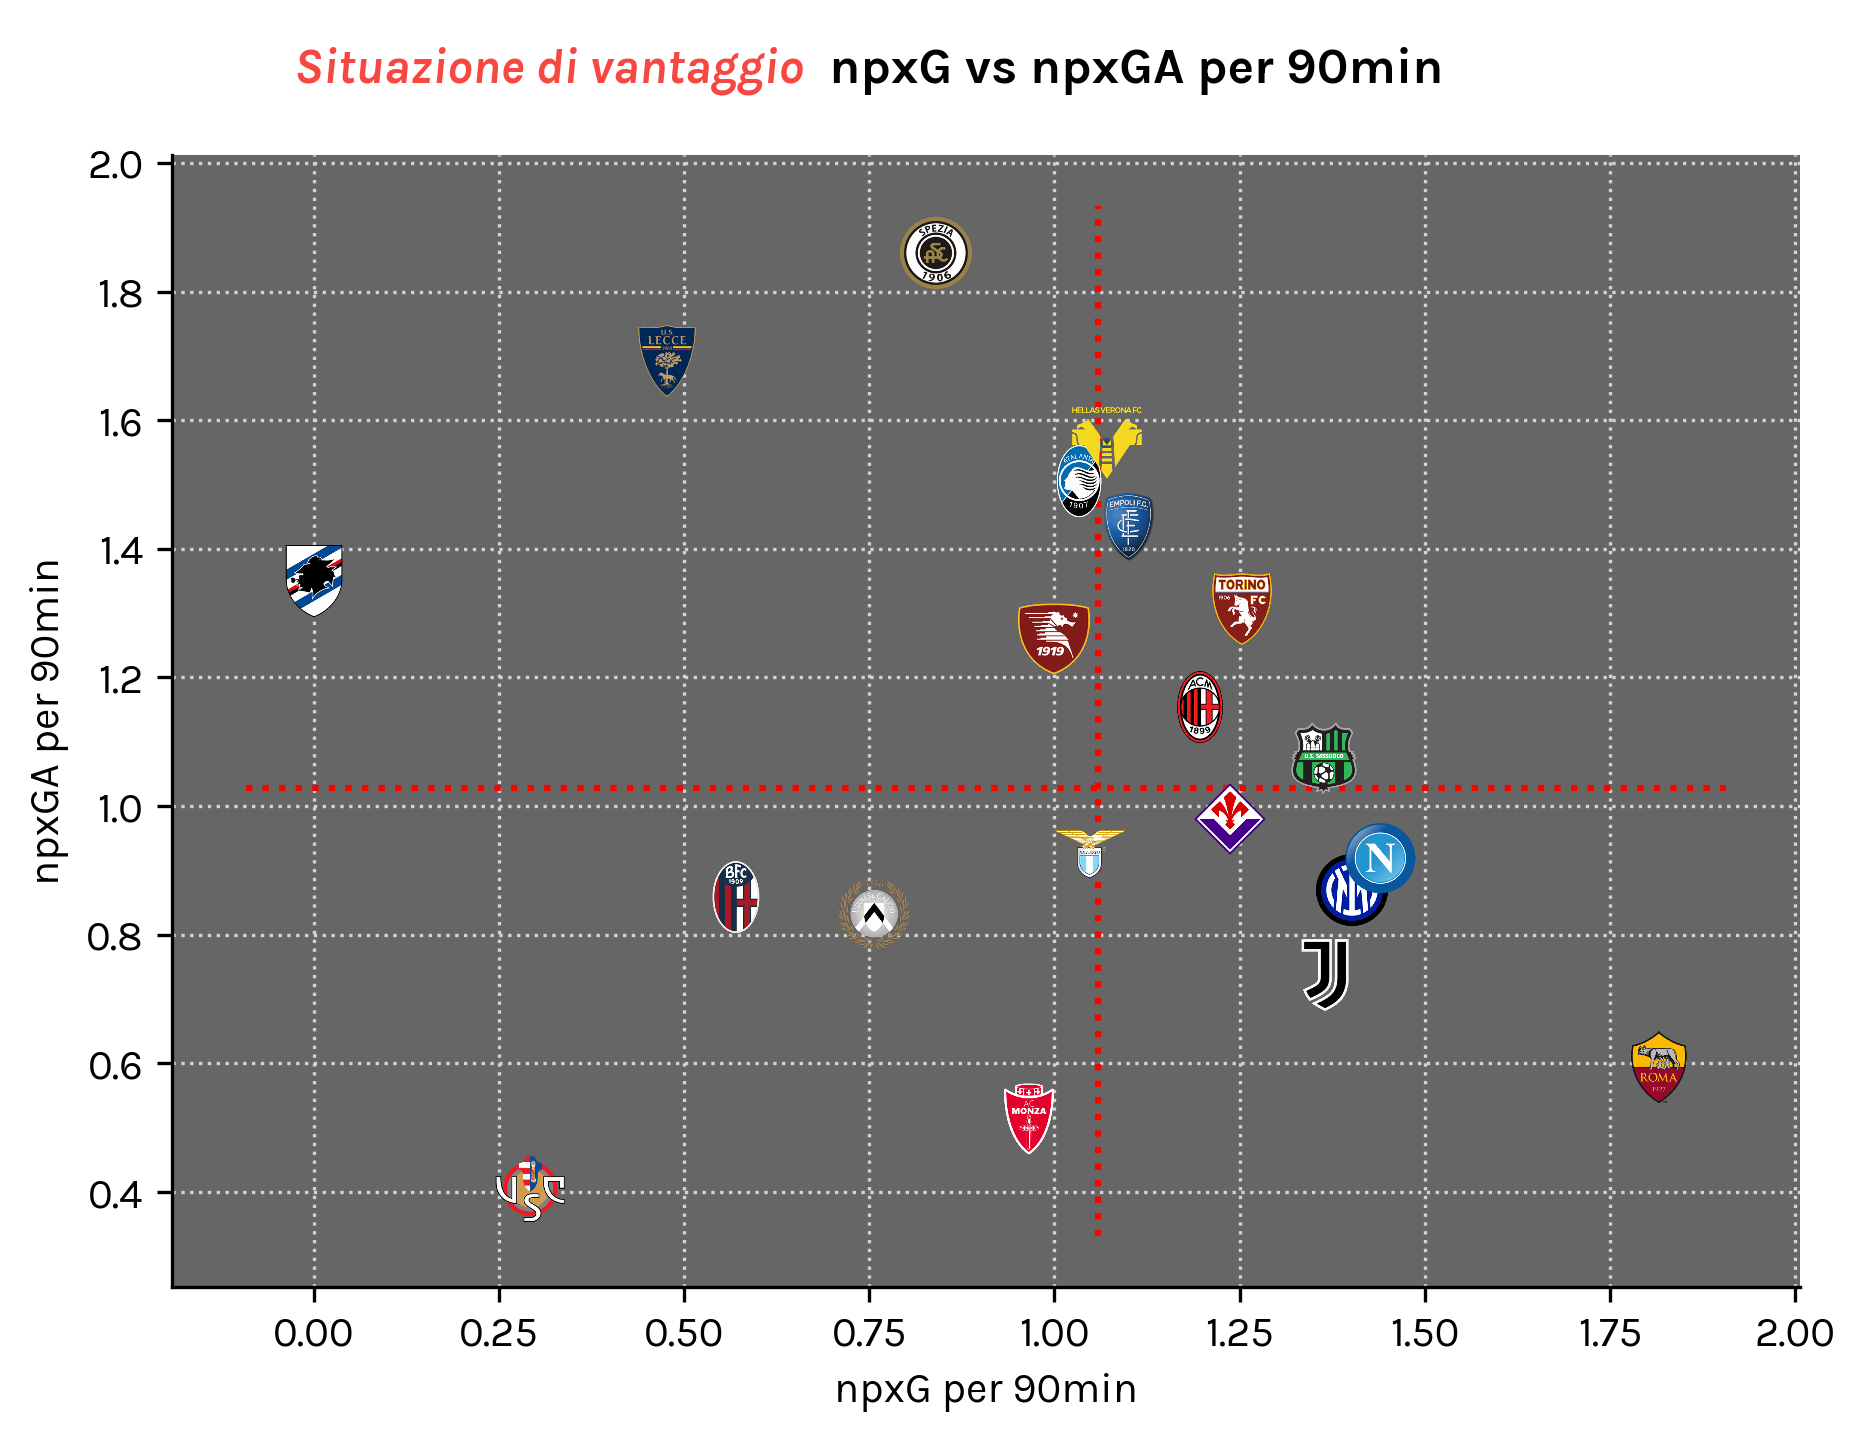

In [6]:
## Vantaggio: scatterplot
dataset = final_5
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)

fig = plt.figure(figsize = (7,5), dpi = 300)
ax = plt.subplot(facecolor = "#666666")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(
    dataset["piuXG90"], 
    dataset["piuXA90"], 
    s = 3, 
    alpha = 0.75, 
    color = "#264653",
    zorder = 3
)
ax.plot(
    [dataset["piuXG90"].median(), dataset["piuXG90"].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "red",
    zorder = 2
)
ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [dataset["piuXA90"].median(), dataset["piuXA90"].median()], 
    ls = ":",
    color = "red",
    zorder = 2
)
ax.grid(True, ls = ":", color = "lightgray")

#squadra = "FIO"
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, name in enumerate(dataset["squadra"]):
    X = dataset["piuXG90"].iloc[index]
    Y = dataset["piuXA90"].iloc[index]
    y_pos = -9
    x_pos = 0
    path = fotmob_url + str(dataset["footId"].iloc[index]) + ".png"
    frame = False
    #if (name == squadra):
    #    frame = True
    ab = AnnotationBbox(getImage(path), (X, Y), frameon=frame)
    ax.add_artist(ab)

ax.set_ylabel("npxGA per 90min")
ax.set_xlabel("npxG per 90min")

fig_text(
        x = 0.73, y = 0.92, 
        s = "<Situazione di vantaggio>  npxG vs npxGA per 90min",
        highlight_textprops=[{"color":"#F64740", "style":"italic"}],
        va = "bottom", ha = "right",
        fontsize = 12, color = "black", weight = "bold"
)
subTitle =  ""
fig_text(
	    x = 0.87, y = .94, 
        s = subTitle,
	    va = "bottom", ha = "right",
	    fontsize = 7, color = "#4E616C",
)

filename = "../figures/xGA_xG_vantaggio_SerieA_22_23_12.png"
plt.savefig(
	    filename,
	    dpi = 600,
	    facecolor = "none",
	    bbox_inches="tight",
        edgecolor="none",
	    transparent = False
    )

### ***Svantaggio***
### [In questa situazione il Napoli spadroneggia ma subito seguito dal MIlan ma qui è evidente il condizionamento dovuto ai pochi minuti trascorsi in svantaggio. Molto bene l'Udinese. In negativo spicca la Lazio che crea pochissimo e concede molto.

C:\Users\fgron\AppData\Local\Temp\ipykernel_21164\1451582927.py:4: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)


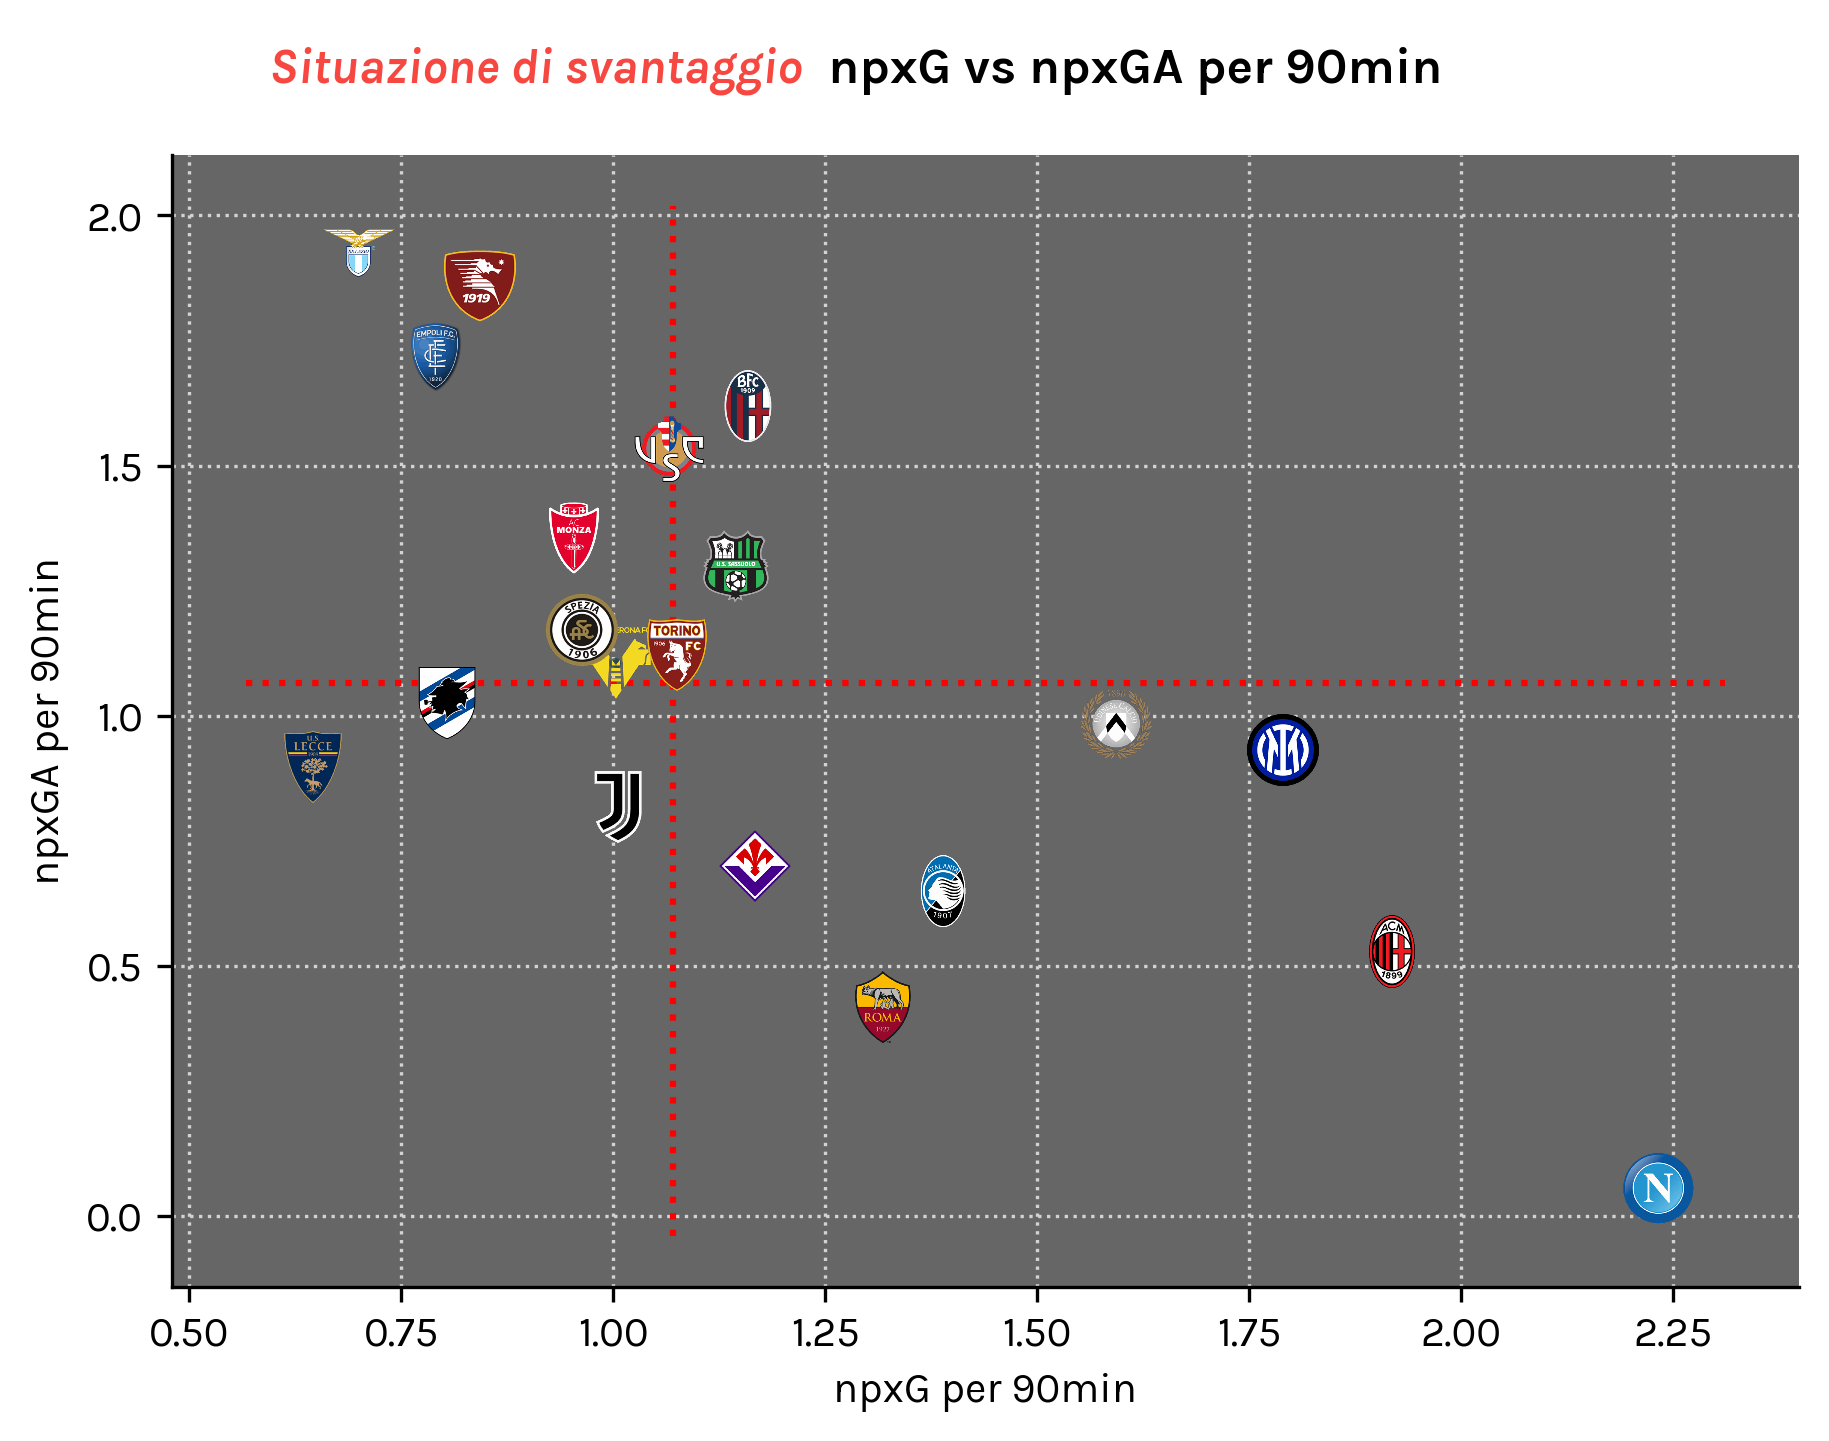

In [7]:
## Svantaggio: scatterplot
dataset = final_5
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)

fig = plt.figure(figsize = (7,5), dpi = 300)
ax = plt.subplot(facecolor = "#666666")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(
    dataset["menoXG90"], 
    dataset["menoXA90"], 
    s = 3, 
    alpha = 0.75, 
    color = "#264653",
    zorder = 3
)
ax.plot(
    [dataset["menoXG90"].median(), dataset["menoXG90"].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "red",
    zorder = 2
)
ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [dataset["menoXA90"].median(), dataset["menoXA90"].median()], 
    ls = ":",
    color = "red",
    zorder = 2
)
ax.grid(True, ls = ":", color = "lightgray")

#squadra = "FIO"
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, name in enumerate(dataset["squadra"]):
    X = dataset["menoXG90"].iloc[index]
    Y = dataset["menoXA90"].iloc[index]
    y_pos = -9
    x_pos = 0
    path = fotmob_url + str(dataset["footId"].iloc[index]) + ".png"
    frame = False
    #if (name == squadra):
    #    frame = True
    ab = AnnotationBbox(getImage(path), (X, Y), frameon=frame)
    ax.add_artist(ab)

ax.set_ylabel("npxGA per 90min")
ax.set_xlabel("npxG per 90min")

fig_text(
        x = 0.73, y = 0.92, 
        s = "<Situazione di svantaggio>  npxG vs npxGA per 90min",
        highlight_textprops=[{"color":"#F64740", "style":"italic"}],
        va = "bottom", ha = "right",
        fontsize = 12, color = "black", weight = "bold"
)
subTitle =  ""
fig_text(
	    x = 0.87, y = .94, 
        s = subTitle,
	    va = "bottom", ha = "right",
	    fontsize = 7, color = "#4E616C",
)

filename = "../figures/xGA_xG_svantaggio_SerieA_22_23_12.png"
plt.savefig(
	    filename,
	    dpi = 600,
	    facecolor = "none",
	    bbox_inches="tight",
        edgecolor="none",
	    transparent = False
    )

In [8]:
# Extra preprocessing
dataset['menoDelta'] = dataset['menoXG90']-dataset['menoXA90']
dataset['zeroDelta'] = dataset['zeroXG90']-dataset['zeroXA90']
dataset['piuDelta'] = dataset['piuXG90']-dataset['piuXA90']

## Infine mettiamo in fila le performance in termini di npxG-npxA (90) nelle diverse situazioni di partita
### Utilizziamo horizontal bar chart

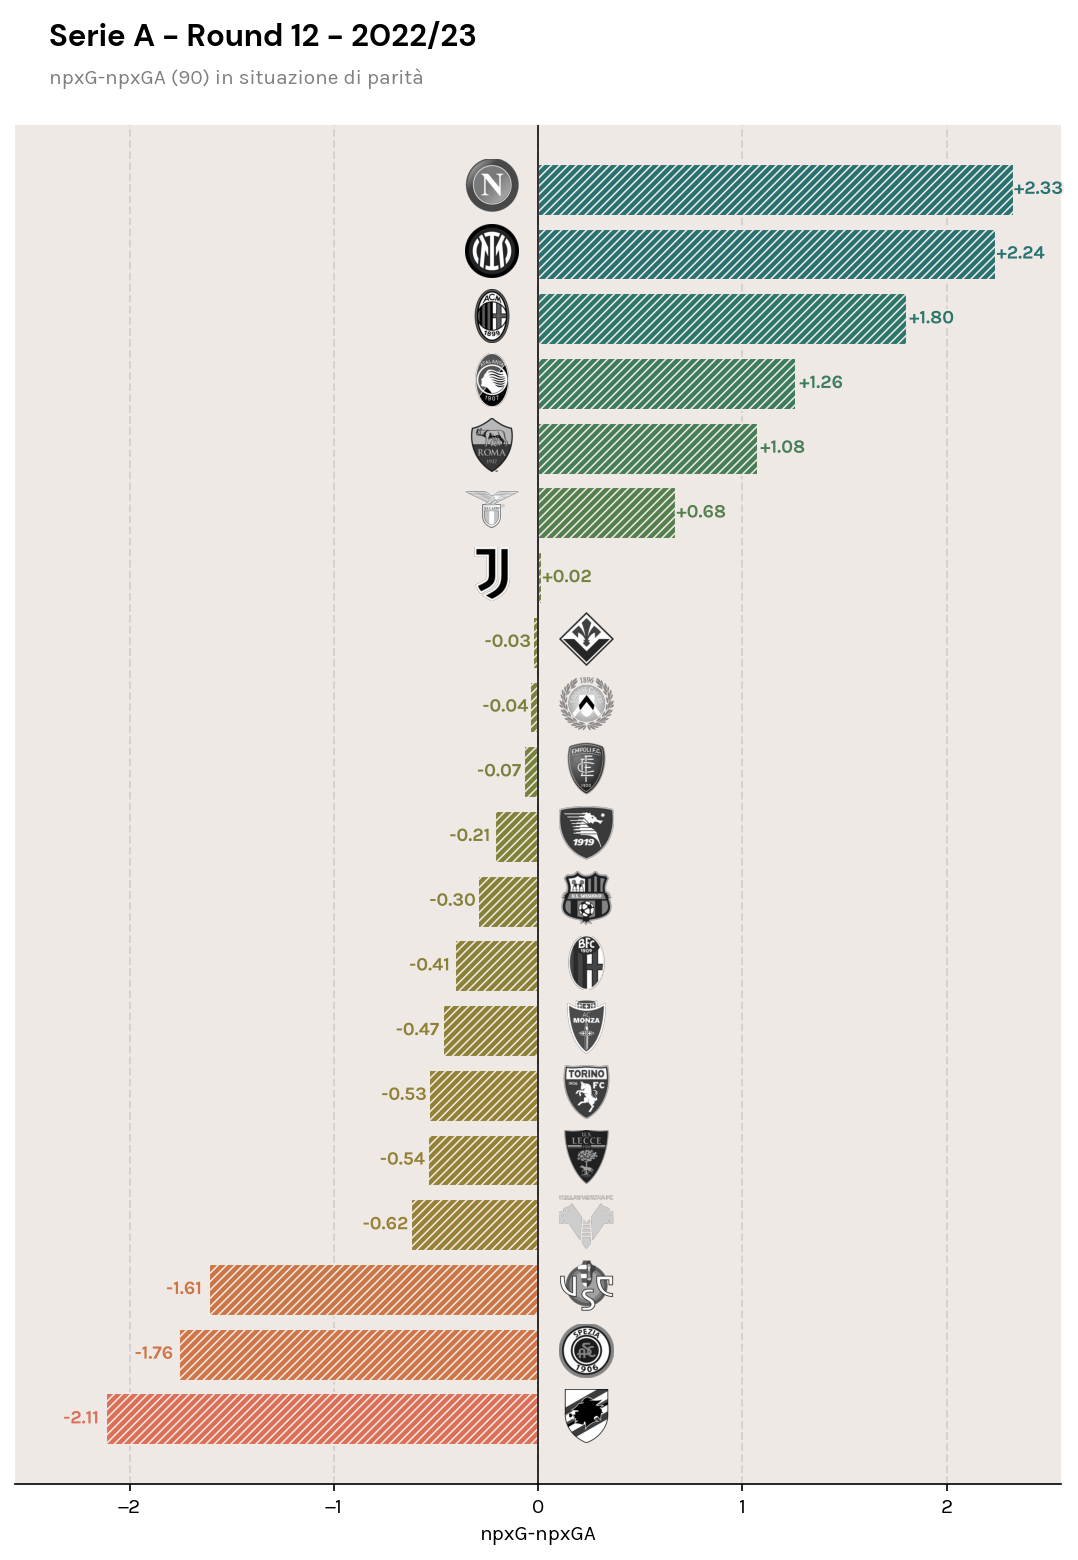

In [12]:
## Parità: horizontal bar chart
dataset_final_zero = dataset[['squadra', 'footId', 'zeroDelta']]
dataset_final_zero = dataset_final_zero.sort_values(by='zeroDelta', ascending=True)
dataset_final_zero = dataset_final_zero.reset_index(drop=True)
data = dataset_final_zero

def add_logo_on_ax(ax, team_id, bw = True):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png')).convert('LA')
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax

fig = plt.figure(figsize=(9,12), dpi=150)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(data['zeroDelta'].min()), data['zeroDelta'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, data.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('npxG-npxGA', size=10)
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=data['zeroDelta'].min(),vmax=data['zeroDelta'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    data.index, data['zeroDelta'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(data['zeroDelta'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)

# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(data['zeroDelta']):
    if x < 0:
        sign_offset = -1
        offset_logo = .10
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = .36
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*12,0),
        text=f'{sign_text}{x:.2f}',
        color= cmap(norm(x)),
        size=9,
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

    # -- Add the logo
    team_id = data['footId'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.04, 0.04], anchor = "C")
    add_logo_on_ax(logo_ax, team_id, True)


    # -- Figure title and arrows --------------------------------
position_negative = data[data['zeroDelta'] < 0].index.max()

position_x_negative = math.floor(-max_*(.85))
position_x_positive = math.ceil(max_*(.85))

ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2


fig_text(
    x = 0.15, y = .92, 
    s = 'Serie A - Round 12 - 2022/23',
    va = 'bottom', ha = 'left',
    fontsize = 15, color = 'black', font = 'DM Sans', weight = 'bold'
)

fig_text(
    x = 0.15, y = 0.9, 
    s = 'npxG-npxGA (90) in situazione di parità',
    va = 'bottom', ha = 'left',
    fontsize = 10, color = 'gray'
)

plt.savefig(
	"../figures/SerieA_12_22_23_xG_xGA_when_drawing.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.show()

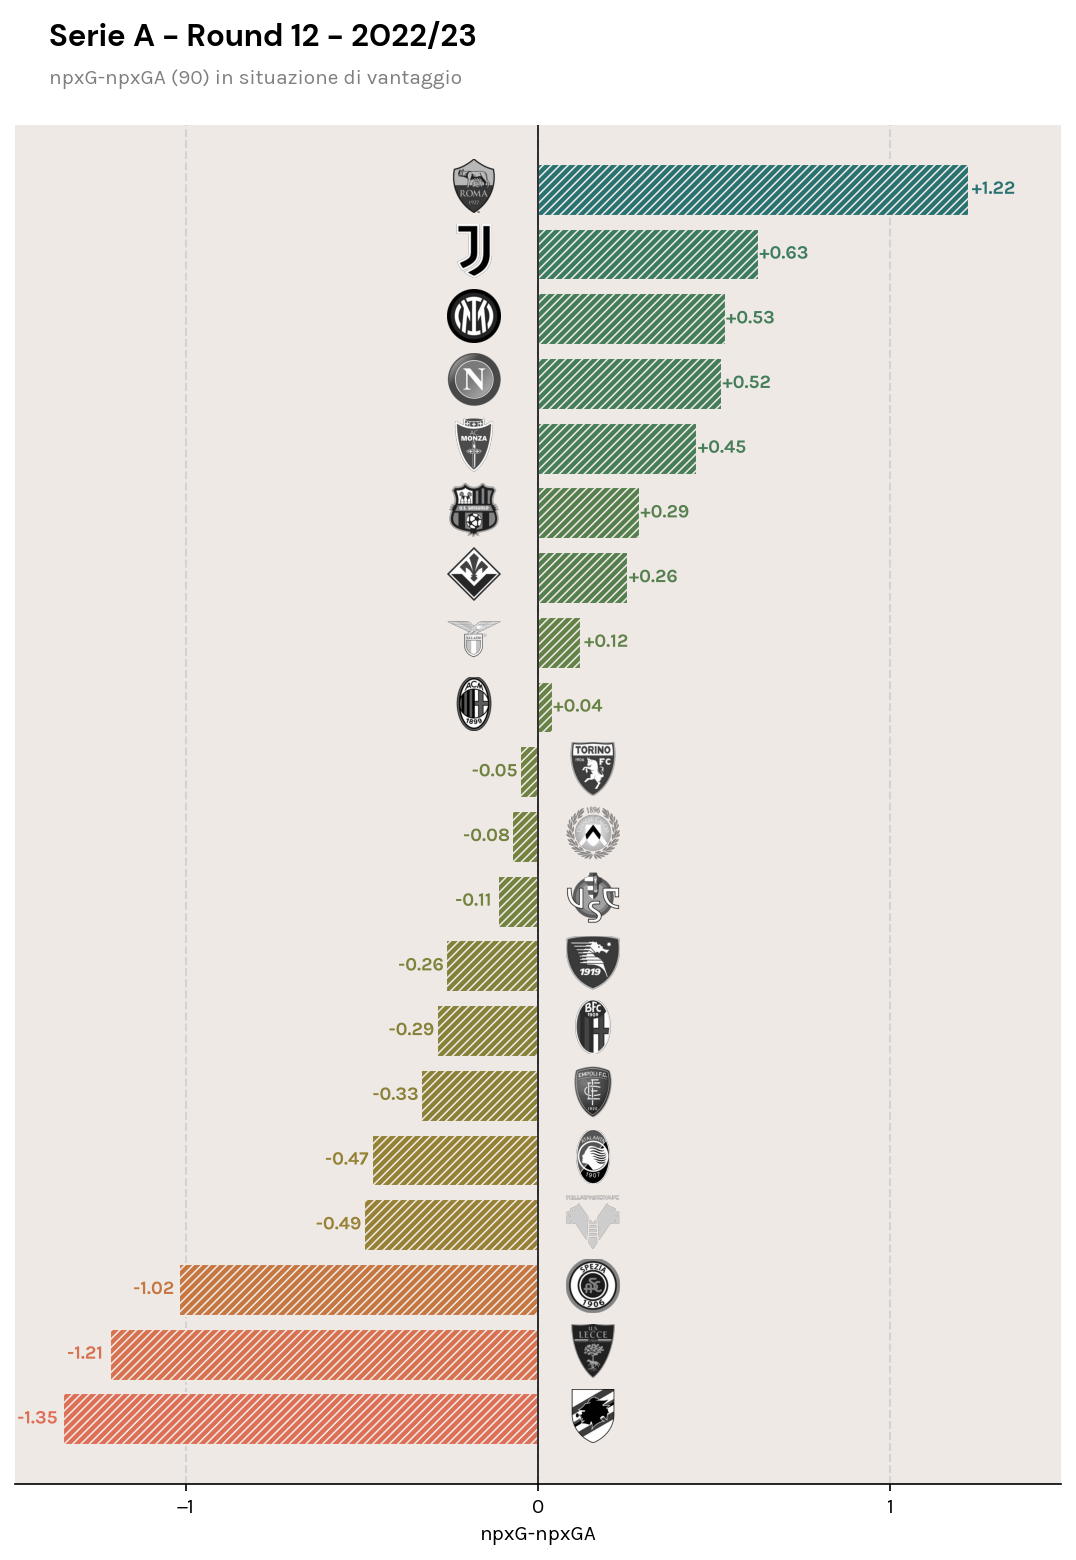

In [13]:
## Vantaggio: horizontal bar chart
dataset_final_piu = dataset[['squadra', 'footId', 'piuDelta']]
dataset_final_piu = dataset_final_piu.sort_values(by='piuDelta', ascending=True)
dataset_final_piu = dataset_final_piu.reset_index(drop=True)
data = dataset_final_piu

def add_logo_on_ax(ax, team_id, bw = True):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png')).convert('LA')
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax

fig = plt.figure(figsize=(9,12), dpi=150)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(data['piuDelta'].min()), data['piuDelta'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, data.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('npxG-npxGA', size=10)
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=data['piuDelta'].min(),vmax=data['piuDelta'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    data.index, data['piuDelta'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(data['piuDelta'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)

# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(data['piuDelta']):
    if x < 0:
        sign_offset = -1
        offset_logo = .08
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = .26
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*12,0),
        text=f'{sign_text}{x:.2f}',
        color= cmap(norm(x)),
        size=9,
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

    # -- Add the logo
    team_id = data['footId'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.04, 0.04], anchor = "C")
    add_logo_on_ax(logo_ax, team_id, True)


    # -- Figure title and arrows --------------------------------
position_negative = data[data['piuDelta'] < 0].index.max()

position_x_negative = math.floor(-max_*(.85))
position_x_positive = math.ceil(max_*(.85))

ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2


fig_text(
    x = 0.15, y = .92, 
    s = 'Serie A - Round 12 - 2022/23',
    va = 'bottom', ha = 'left',
    fontsize = 15, color = 'black', font = 'DM Sans', weight = 'bold'
)

fig_text(
    x = 0.15, y = 0.9, 
    s = 'npxG-npxGA (90) in situazione di vantaggio',
    va = 'bottom', ha = 'left',
    fontsize = 10, color = 'gray'
)

plt.savefig(
	"../figures/SerieA_12_22_23_xG_xGA_when_winning.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.show()

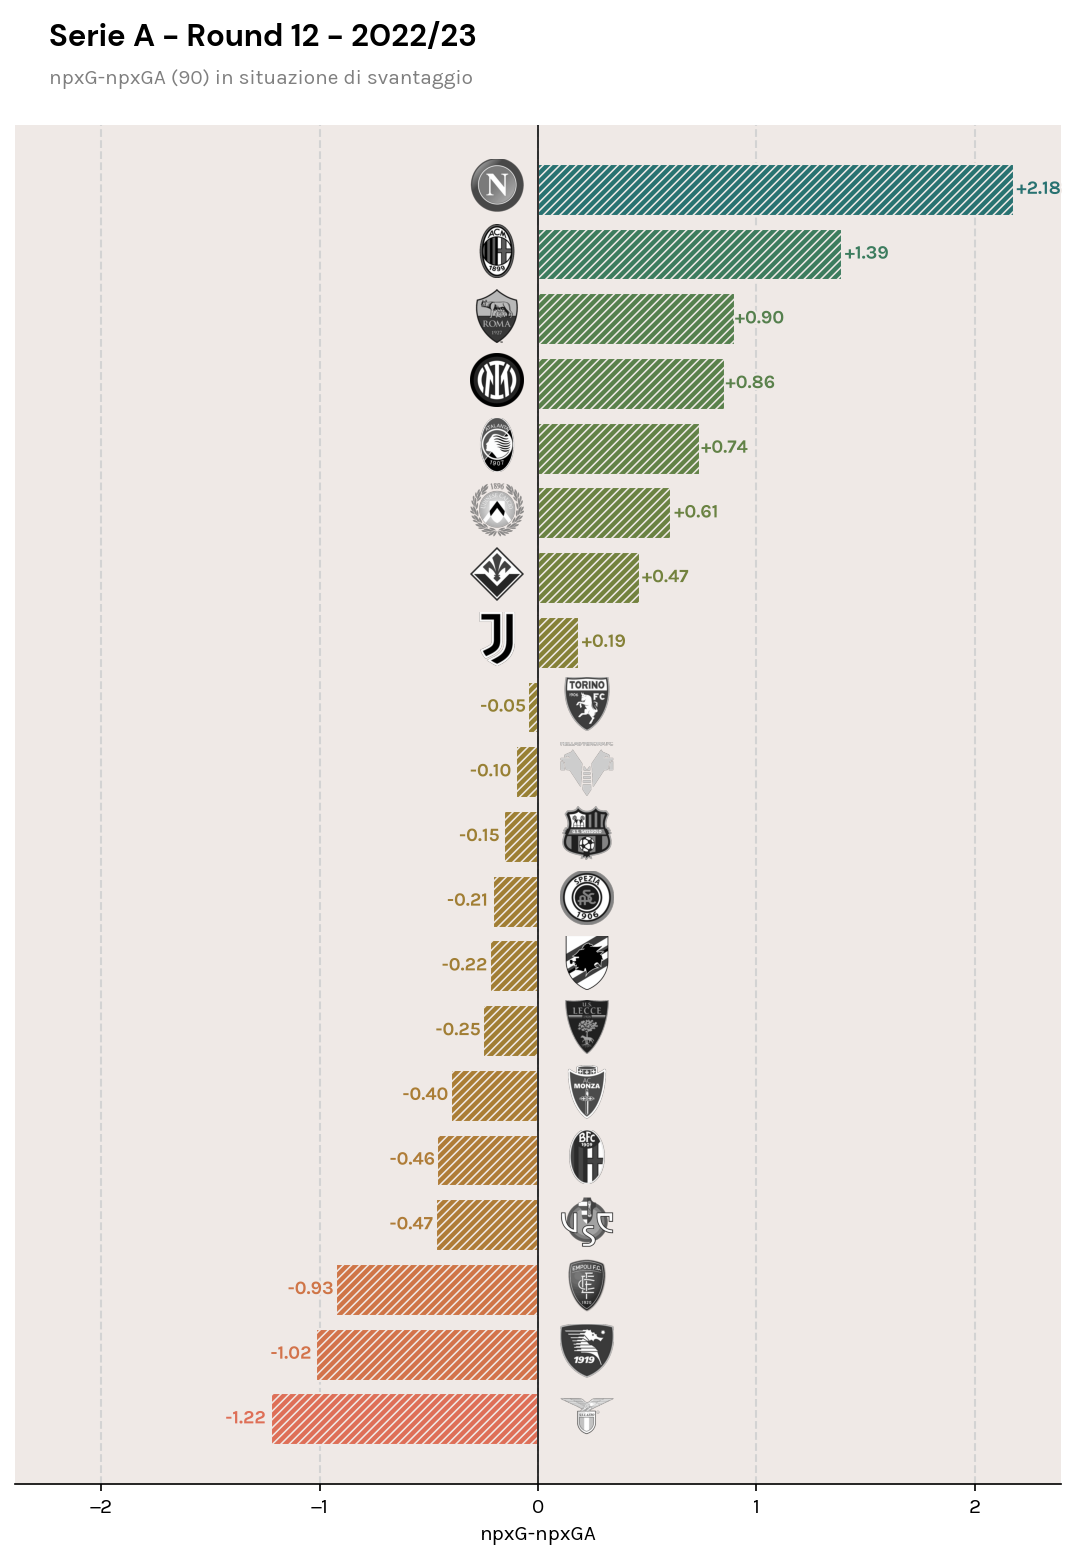

In [17]:
## Svantaggio: horizontal bar chart
dataset_final_meno = dataset[['squadra', 'footId', 'menoDelta']]
dataset_final_meno = dataset_final_meno.sort_values(by='menoDelta', ascending=True)
dataset_final_meno = dataset_final_meno.reset_index(drop=True)
data = dataset_final_meno

def add_logo_on_ax(ax, team_id, bw = True):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png')).convert('LA')
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax

fig = plt.figure(figsize=(9,12), dpi=150)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(data['menoDelta'].min()), data['menoDelta'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, data.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('npxG-npxGA', size=10)
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=data['menoDelta'].min(),vmax=data['menoDelta'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    data.index, data['menoDelta'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(data['menoDelta'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)

# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(data['menoDelta']):
    if x < 0:
        sign_offset = -1
        offset_logo = .1
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = .31
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*12,0),
        text=f'{sign_text}{x:.2f}',
        color= cmap(norm(x)),
        size=9,
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

    # -- Add the logo
    team_id = data['footId'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.04, 0.04], anchor = "C")
    add_logo_on_ax(logo_ax, team_id, True)


    # -- Figure title and arrows --------------------------------
position_negative = data[data['menoDelta'] < 0].index.max()

position_x_negative = math.floor(-max_*(.85))
position_x_positive = math.ceil(max_*(.85))

ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2


fig_text(
    x = 0.15, y = .92, 
    s = 'Serie A - Round 12 - 2022/23',
    va = 'bottom', ha = 'left',
    fontsize = 15, color = 'black', font = 'DM Sans', weight = 'bold'
)

fig_text(
    x = 0.15, y = 0.9, 
    s = 'npxG-npxGA (90) in situazione di svantaggio',
    va = 'bottom', ha = 'left',
    fontsize = 10, color = 'gray'
)

plt.savefig(
	"../figures/SerieA_12_22_23_xG_xGA_when_losing.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.show()